<a href="https://colab.research.google.com/github/guilherme-beserra/TCC---PUC-Minas/blob/main/Classifica%C3%A7%C3%A3o_para_predi%C3%A7%C3%A3o_de_v%C3%ADtima_fatal_em_acidente_a%C3%A9reo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de conclusão de curso - Big data e Ciências de Dados PUC-Minas

@autor: Guilherme Nathanli Ribeiro Beserra

# 1 - Classificação para predição de vítima fatal em acidente aéreo

Iremos analisar as ocorrências de acidentes/incidentes aéreos que ocorreram no período de 2010 a 2009 no Brasil.

O Objetivo é classificar, a partir de uma dada ocorrência, se ela contém pelo menos 1 (uma) vítmia fatal ou não, ou seja, se em dado acidente/incidente observa-se fatalidade ou não.

## 2 - Aquisição dos Dados


Serão utilizadas as bases de dados fornecidas pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA), orgão responsável pela investigação de todos os acidentes ou incidentes aéreos no país.

Os dados estão disponíveis em: https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

Vamos utilizar as tabelas disponíveis em formato CSV: aeronave.csv, fator_contribuinte.csv, ocorrencia.csv e ocorrencia_tipo.csv, conforme o modelo de dados: 

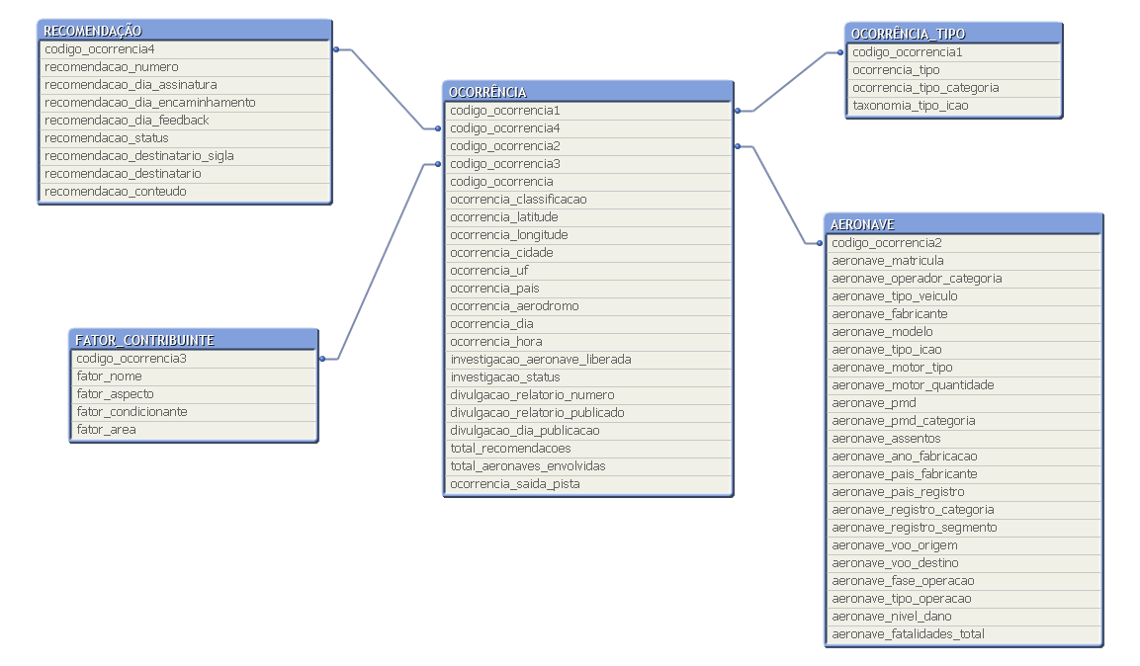

Ao longo deste notebook, as tabelas OCORRÊNCIA, FATOR_CONTRIBUINTE, AERONAVE e OCORRENCIA_TIPO e RECOMENDAÇÃO serão analisadas e verificada a possibilidade  de que todas sejam unificadas (conforme especificação do modelo).
Na coluna ``aeronave_fatalidade_total`` da tabela AERONAVE (``aeronave.csv``) iremos associar 0 se não houve nenhuma vítima fatal (total igual a zero) e 1 caso contrário (total de vítimas igual a 1 ou mais).

Também serão utilizadas as tabelas oriundas IBGE dos estados (``estados.csv``) e municípios (``municipios.csv``) contendo as latitudes e longitudes dos municípios para posterior preenchimento das latitudes e longitudes ausentes ou inconsistentes presentes nas ocorrências dos acidentes e incidentes aéreos. Os arquivos ``.csv`` de foram obtidos a partir do trabalho realizado por Leonardo Diegues que formatou os dados brutos do IBGE: https://github.com/kelvins/Municipios-Brasileiros/blob/main/csv
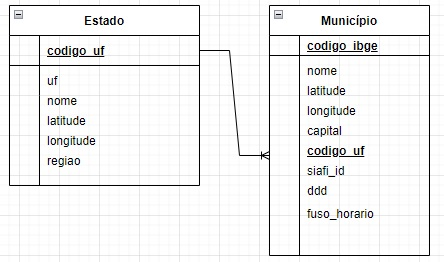

## 3 - Tratamento de dados

In [1066]:
!pip install scikit-plot -q

In [1067]:
# importando os pacotes necessários
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skplt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import numpy as np
pd.set_option("display.max_columns", None)


In [1068]:
# importando a tabela ocorrencia.csv
caminho_ocorrencia = "https://raw.githubusercontent.com/guilherme-beserra/TCC---PUC-Minas/main/dados/ocorrencia.csv"
df_ocorrencia = pd.read_csv(caminho_ocorrencia, sep=';')

# monstrando as 5 primeiras entradas
df_ocorrencia.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [1069]:
# verificando os tipos dos dados
df_ocorrencia.dtypes

codigo_ocorrencia                  int64
codigo_ocorrencia1                 int64
codigo_ocorrencia2                 int64
codigo_ocorrencia3                 int64
codigo_ocorrencia4                 int64
ocorrencia_classificacao          object
ocorrencia_latitude               object
ocorrencia_longitude              object
ocorrencia_cidade                 object
ocorrencia_uf                     object
ocorrencia_pais                   object
ocorrencia_aerodromo              object
ocorrencia_dia                    object
ocorrencia_hora                   object
investigacao_aeronave_liberada    object
investigacao_status               object
divulgacao_relatorio_numero       object
divulgacao_relatorio_publicado    object
divulgacao_dia_publicacao         object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
dtype: object

In [1070]:
print("Valores únicos (por coluna):\n{}\n".format(df_ocorrencia.nunique()))

Valores únicos (por coluna):
codigo_ocorrencia                 6114
codigo_ocorrencia1                6114
codigo_ocorrencia2                6114
codigo_ocorrencia3                6114
codigo_ocorrencia4                6114
ocorrencia_classificacao             3
ocorrencia_latitude               2732
ocorrencia_longitude              2728
ocorrencia_cidade                 1133
ocorrencia_uf                       28
ocorrencia_pais                      1
ocorrencia_aerodromo               531
ocorrencia_dia                    3155
ocorrencia_hora                    982
investigacao_aeronave_liberada       3
investigacao_status                  2
divulgacao_relatorio_numero       1897
divulgacao_relatorio_publicado       2
divulgacao_dia_publicacao          217
total_recomendacoes                 17
total_aeronaves_envolvidas           3
ocorrencia_saida_pista               2
dtype: int64



### Dicionário de Variáveis da tabela ocorrência.csv

* `codigo_ocorrencia` - é o código-chave da ocorrência registrada pelo CENIPA quando algum acidente ou incidente ocorre.  
* `ocorrencia_classificacao` - indica se a ocorrência foi um acidente, incidente ou incidente grave.
* `ocorrencia_latitude` - indica a latitude da ocorrência.
* `ocorrencia_longitude` - indica a longitude da ocorrência.
* `ocorrencia_cidade` - a cidade brasileira onde foi registrada a ocorrência.
* `ocorrencia_uf` - sigla do estado onde foi registrada a ocorrência.
* `ocorrencia_pais` - o país onde foi registrada a ocorrência e neste caso a coluna apresenta apenas um valor, Brasil.
* `ocorrencia_aeródromo` - sigla do aeródromo onde se registrou a ocorrência.
* `ocorrencia_dia` - dia da ocorrência do acidente ou incidente.
* `ocorrencia_hora` - horário de Brasília da ocorrência.
* `investigacao_aeronave_liberada` - indica se a aeronave foi ou não liberada para investigação após o acidente ou incidente.
* `investigacao_status` - indica se a investigação foi encerrada ("SIM") ou ainda está pendente ("NÃO").
* `divulgacao_relatorio_numero` - código do relatório de investigação da ocorrência.
* `divulgacao_relatorio_divulgado` - indica se o relatório foi divulgado ("SIM") ou não ("NÃO").
* `divulgacao_relatorio_divulgado` - data de divulgação do relatório.
* `total_recomendacoes` - total de recomendações para a ocorrência.
* `total_aeronaves_envolvidas` - quantidade de aeronaes envolvidas na ocorrência.
* `ocorrencia_saida_pista` - indica se a aeronve saiu ("SIM") ou não ("NÃO").

In [1071]:
# mostrando a quantidade de linhas e colunas
print("Número de linhas: ", df_ocorrencia.shape[0])
print("Número de colunas: ", df_ocorrencia.shape[1])

Número de linhas:  6114
Número de colunas:  22


Mostra que os valores das colunas de codigo_ocorrencia são iguais  e portanto será deixada apenas a coluna codigo_ocorrencia.

In [1072]:
# verificando se os códigos da ocorrência são únicos
print("Valores únicos para código ocorrência: ", df_ocorrencia[['codigo_ocorrencia']].nunique())

Valores únicos para código ocorrência:  codigo_ocorrencia    6114
dtype: int64


Conforme observado, os valores das colunas contendo os códigos das ocorrências são únicos.

In [1073]:
# importando a tabela ocorrencia_tipo.csv
caminho_ocorrencia_tipo = "https://raw.githubusercontent.com/guilherme-beserra/TCC---PUC-Minas/main/dados/ocorrencia_tipo.csv"
df_ocorrencia_tipo = pd.read_csv(caminho_ocorrencia_tipo, sep=';')

# monstrando as 5 primeiras entradas
df_ocorrencia_tipo.head()

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,39115,PANE SECA,COMBUSTÍVEL | PANE SECA,FUEL
1,39155,VAZAMENTO DE COMBUSTÍVEL,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
2,39156,FOGO EM VOO,FOGO/FUMAÇA (SEM IMPACTO) | FOGO EM VOO,F-NI
3,39158,SUPERAQUECIMENTO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | SUPERAQU...,SCF-PP
4,39176,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP


In [1074]:
# verificando os tipos dos dados
df_ocorrencia_tipo.dtypes

codigo_ocorrencia1            int64
ocorrencia_tipo              object
ocorrencia_tipo_categoria    object
taxonomia_tipo_icao          object
dtype: object

### Dicionário de Variáveis da tabela ocorrencia_tipo

* `codigo_ocorrencia1` - código do tipo da ocorrência registrada pelo CENIPA.
* `ocorrencia_tipo` - é o tipo principal da causa do acidente ou incidente com a aeronave.
* `ocorrencia_tipo_categoria` - é a categoria do tipo da ocorrência, dando uma descrição mais detalhada da principal causa do acidente ou incidente com a aeronave.
* `taxonomia_tipo_icao` - é o código que indica o tipo de problema ocorrido, conforme figura abaixo:
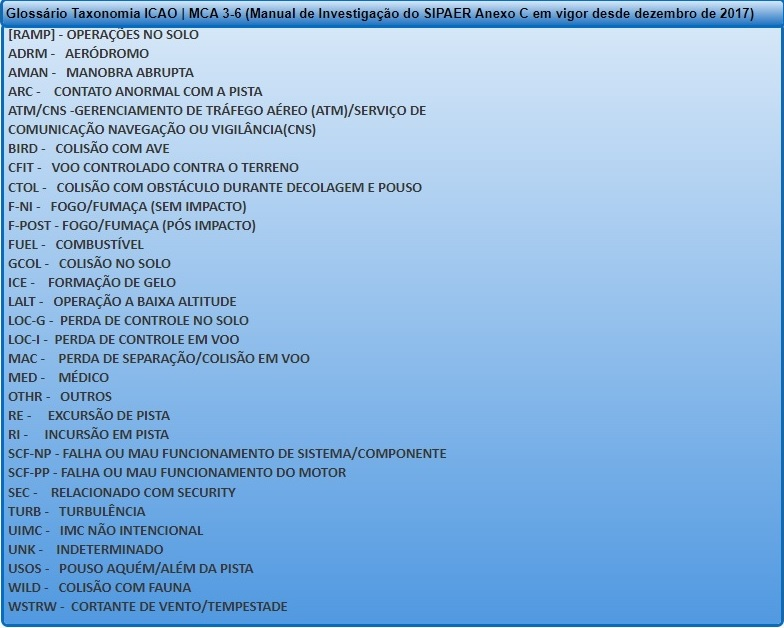

In [1075]:
# mostrando a quantidade de linhas e colunas
print("Número de linhas: ", df_ocorrencia_tipo.shape[0])
print("Número de colunas: ", df_ocorrencia_tipo.shape[1])

Número de linhas:  6283
Número de colunas:  4


In [1076]:
# verificando os códigos da ocorrência únicos para o tipo de ocorrência
print("Valores únicos para código ocorrência do tipo:", df_ocorrencia_tipo['codigo_ocorrencia1'].nunique())

Valores únicos para código ocorrência do tipo: 6114


In [1077]:
# vericicando as linhas com o codigo_ocorrencia1 duplicadas
df_ocorrencia_tipo[df_ocorrencia_tipo['codigo_ocorrencia1'].duplicated(keep=False)]

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
49,39913,COM PARA-BRISAS / JANELA / PORTA,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
50,39913,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
68,40147,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE
69,40147,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
97,40269,COM TREM DE POUSO,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP
...,...,...,...,...
6216,80175,CORTANTE DE VENTO / TEMPESTADE,CORTANTE DE VENTO / TEMPESTADE,WSTRW
6217,80176,PERDA DE CONTROLE EM VOO,PERDA DE CONTROLE EM VOO,LOC-I
6218,80176,REBOQUE DE PLANADOR,REBOQUE DE PLANADOR,GTOW
6280,80258,COLISÃO COM FAUNA,COLISÃO COM FAUNA,WILD


In [1078]:
#verificando se existem linhas duplicadas para o tipo de ocorrência
print("Linhas duplicadas em tipo de ocorrência: ", df_ocorrencia_tipo.duplicated().sum())

Linhas duplicadas em tipo de ocorrência:  0


Como a tabela não está normalizada, temos que para um mesmo código de ocorrência existem vários tipos de ocorrência. Isso se deve ao fato de que uma ocorrência pode estar relacionada a mais de um problema (``tipo_ocorrencia``). Como mostrado acima, foi verificado que para ocorrência de nº 39913 houve "falha ou mau funcionamento do sistema..." e "excursão de pista". Embora isso seja possível, percebemos que não existem linhas duplicadas.

In [1079]:
# importando a tabela aeronave.csv
caminho_aeronave = "https://raw.githubusercontent.com/guilherme-beserra/TCC---PUC-Minas/main/dados/aeronave.csv"
df_aeronave = pd.read_csv(caminho_aeronave, sep=';')

# monstrando as 5 primeiras entradas
df_aeronave.head()

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,39115,PTNQX,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711A,P28R,PISTÃO,MONOMOTOR,1202,1202,4.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,BRIGADEIRO ARARIPE MACEDO,CORRENTINA,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
1,39155,PTLVI,***,AVIÃO,BEECH AIRCRAFT,C90,BE9L,TURBOÉLICE,BIMOTOR,4377,4377,8.0,1979.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,PRIVADA,NENHUM,0
2,39156,PPPTO,***,AVIÃO,AEROSPATIALE AND ALENIA,ATR-72-212A,AT72,TURBOÉLICE,BIMOTOR,22500,22500,73.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,AFONSO PENA,ADALBERTO MENDES DA SILVA,ARREMETIDA NO AR,REGULAR,LEVE,0
3,39158,PRLGJ,REGULAR,AVIÃO,BOEING COMPANY,757-225,B752,JATO,BIMOTOR,108862,108862,5.0,1984.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0
4,39176,PRMAA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,77000,77000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,SUBIDA,REGULAR,NENHUM,0


In [1080]:
# verificando os tipos dos dados
df_aeronave.dtypes

codigo_ocorrencia2               int64
aeronave_matricula              object
aeronave_operador_categoria     object
aeronave_tipo_veiculo           object
aeronave_fabricante             object
aeronave_modelo                 object
aeronave_tipo_icao              object
aeronave_motor_tipo             object
aeronave_motor_quantidade       object
aeronave_pmd                     int64
aeronave_pmd_categoria           int64
aeronave_assentos              float64
aeronave_ano_fabricacao        float64
aeronave_pais_fabricante        object
aeronave_pais_registro          object
aeronave_registro_categoria     object
aeronave_registro_segmento      object
aeronave_voo_origem             object
aeronave_voo_destino            object
aeronave_fase_operacao          object
aeronave_tipo_operacao          object
aeronave_nivel_dano             object
aeronave_fatalidades_total       int64
dtype: object

### Dicionário de Variáveis da tabela aeronave.csv

* `codigo_ocorrencia2` - código da aeronave na ocorrência registrada pelo CENIPA.
* `aeronave_matricula` - código da matrícula da aeronave registrada para inicar sua operação no aeródromo.
* `aeronave_operador_categoria` - indica qual a operação aquela aeronave está autorizada a proceder: Experimental, instrução, regular etc.
* `aeronave_tipo_veiculo` - tipo da aeronave: avião, helicóptero etc.
* `aeronave_fabricante` - indica qual o frabricante da aeronve.
* `aeronave_operador_categoria` - indica o modelo da aeronave.
* `aeronave_tipo_icao` - indica o tipo do modelo da aeronave.
* `aeronave_motor_tipo` - indica o tipo do motor da aeronave.
* `aeronave_motor_quantidade` - indica quantos motores tem a aeronave: 1, 2 etc.
* `aeronave_pmd` - indica o peso máximo que a aeronave suporta na decolagem.
* `aeronave_pmd_categoria` - variável duplicada: indica o peso máximo que a aeronave suporta na decolagem.
* `aeronave_assentos` - total de assentos da aeronave.
* `aeronave_ano_fabricacao` - indica o ano de frabricação da aeronave.
* `aeronave_pais_fabrincate` - indica em qual país o avião foi fabricado.
* `aeronave_pais_registro` - indica em qual país o avião foi registrado.
* `aeronave_registro_categoria` - indica a categoria registrada da aeronave.
* `aeronave_registro_segmento` - indica qual em qual operação aquela aeronave foi inicalmente registrada.
* `aeronave_voo_origem` - indica de onde a aeronave partiu (decolou).
* `aeronave_voo_destino` - indica onde a aeronave pousou ou deveria pousar (decolou).
* `aeronave_fase_operacao` - indica em que fase do voo ocorreu o acidente ou incidente: decolagem, pouso etc.
* `aeronave_tipo_opercao` - indica qual o tipo de voo estava sendo realizado no momento da ocorrência: experimental, táxi aéreo etc.
* `aeronave_nivel_dano` - indica o quanto a aeronave foi danificada no acidente ou incidente (destruída, dano substancial etc).
* `aeronave_fatalidades_total` - será a variável alvo do modelo, indicando a quantidade de vítimas fatais no acidente ou incidente. Caso tenha ocorrido pelo menos uma vítima fatal, a variável receberá 1(um), caso contrário 0(zero).

In [1081]:
# mostrando a quantidade de linhas e colunas
print("Número de linhas: ", df_aeronave.shape[0])
print("Número de colunas: ", df_aeronave.shape[1])

Número de linhas:  6188
Número de colunas:  23


In [1082]:
# verificando os valores únicos para os códigos de ocorrência da aeronave
print("Valores únicos para ocorrência: ", df_aeronave['codigo_ocorrencia2'].nunique())

Valores únicos para ocorrência:  6114


In [1083]:
# vericicando as linhas com o codigo_ocorrencia1 duplicadas
df_aeronave[df_aeronave['codigo_ocorrencia2'].duplicated(keep=False)]

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
221,41609,PRGIO,REGULAR,AVIÃO,BOEING COMPANY,737-85F,B738,JATO,BIMOTOR,79015,79015,194.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,REGULAR,LEVE,0
222,41609,PTMZA,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A319-132,A319,JATO,BIMOTOR,64000,64000,154.0,1999.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,OPERAÇÃO DE SOLO,REGULAR,LEVE,0
603,43869,PUFAT,EXPERIMENTAL,ULTRALEVE,FABRICACAO PROPRIA,FOX V5 SUPER,ULAC,PISTÃO,MONOMOTOR,417,417,0.0,0.0,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,EXPERIMENTAL,DESTRUÍDA,1
604,43869,PURHM,EXPERIMENTAL,ULTRALEVE,***,FOX II,ULAC,PISTÃO,MONOMOTOR,417,417,2.0,1990.0,BRASIL,BRASIL,ULTRALEVE,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,EXPERIMENTAL,DESTRUÍDA,0
909,44944,PPXIG,***,AVIÃO,***,N-592-420,ZZZZ,PISTÃO,MONOMOTOR,1040,1040,4.0,1968.0,BRASIL,BRASIL,AVIÃO,EXPERIMENTAL,FORA DE AERODROMO,FORA DE AERODROMO,CRUZEIRO,EXPERIMENTAL,DESTRUÍDA,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846,79831,PRGUC,***,AVIÃO,BOEING COMPANY,737-8EH,B738,JATO,BIMOTOR,70533,70533,193.0,2010.0,BRASIL,BRASIL,AVIÃO,REGULAR,GOVERNADOR ANDRÉ FRANCO MONTORO,AFONSO PENA,PROCEDIMENTO DE APROXIMAÇÃO IFR,REGULAR,NENHUM,0
6122,80176,PPFJZ,***,PLANADOR,INDÚSTRIA PARANAENSE DE ESTRUTURAS,IPE-02B,GLID,SEM TRAÇÃO,SEM TRAÇÃO,565,565,2.0,1989.0,BRASIL,BRASIL,PLANADOR,INSTRUÇÃO,BEBEDOURO,BEBEDOURO,DECOLAGEM,PRIVADA,SUBSTANCIAL,0
6123,80176,PPGAP,***,AVIÃO,AERO BOERO,AB-180,AB18,PISTÃO,MONOMOTOR,844,844,2.0,1991.0,BRASIL,BRASIL,AVIÃO,INSTRUÇÃO,BEBEDOURO,BEBEDOURO,DECOLAGEM,PRIVADA,NENHUM,0
6163,80226,PRVBX,***,AVIÃO,BOEING COMPANY,737-7BX,B737,JATO,BIMOTOR,70080,70080,154.0,2000.0,BRASIL,BRASIL,AVIÃO,REGULAR,GOVERNADOR ANDRÉ FRANCO MONTORO,REGIONAL HUGO CANTERGIANI,PROCEDIMENTO DE APROXIMAÇÃO IFR,REGULAR,NENHUM,0


In [1084]:
#verificando se existem linhas duplicadas para tabela de aeronaves
print("Linhas duplicadas para tabela de aeronaves: ", df_aeronave.duplicated().sum())

Linhas duplicadas para tabela de aeronaves:  0


Como a tabela não está normalizada, temos que para um mesmo código de ocorrência existem mais de uma aeronave. Isso se deve ao fato de que uma ocorrência pode envolever mais de uma aeronave, conforme mostrado na coluna ``total_aeronaves_envolvidas`` da tabela de ocorrências. Embora isso seja possível, nota-se que não existem linhas duplicadas.

In [1085]:
# importando a tabela fator_contribuinte.csv
caminho_fator_contribuinte = "https://raw.githubusercontent.com/guilherme-beserra/TCC---PUC-Minas/main/dados/fator_contribuinte.csv"
df_fator_contribuinte = pd.read_csv(caminho_fator_contribuinte, sep=';')

# monstrando as 5 primeiras entradas
df_fator_contribuinte.head()

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [1086]:
# verificando os tipos dos dados
df_fator_contribuinte.dtypes

codigo_ocorrencia3      int64
fator_nome             object
fator_aspecto          object
fator_condicionante    object
fator_area             object
dtype: object

### Dicionário de Variáveis da tabela fator_contribuinte.csv

* `codigo_ocorrencia3` - código do fator contribuinte na ocorrência registrada pelo CENIPA.
* `fator_nome` - nome do fator que contribuiu para o acidente ou incidente.
* `fator_aspecto` - indica qual o aspecto principal relativa ao fator que contribuiu para o acidente ou incidente.
* `fator_condicionante` - fator condicionante da ocorrência do acidente ou incidente como, por exemplo, manutenção da aeronave ou erro do piloto ao operá-la.
* `fator_area` - indica a área do fator contribuinte: se fator humano ou operacional.


In [1087]:
# mostrando a quantidade de linhas e colunas
print("Número de linhas: ", df_fator_contribuinte.shape[0])
print("Número de colunas: ", df_fator_contribuinte.shape[1])

Número de linhas:  4485
Número de colunas:  5


In [1088]:
# verificando os valores únicos para os códigos de ocorrência do fator contribuinte
print("Valores únicos para ocorrência do fator contribuinte: ", df_fator_contribuinte['codigo_ocorrencia3'].nunique())

Valores únicos para ocorrência do fator contribuinte:  1152


In [1089]:
# vericicando as linhas com o codigo_ocorrencia3 duplicadas
df_fator_contribuinte[df_fator_contribuinte['codigo_ocorrencia3'].duplicated(keep=False)]

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,39115,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,39115,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
2,39115,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,39115,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39115,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
...,...,...,...,...,...
4480,79713,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4481,79713,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4482,79713,MEMÓRIA,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
4483,79713,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO


In [1090]:
#verificando se existem linhas duplicadas para tabela de aeronaves
print("Linhas duplicadas para tabela de fator_contribuinte: ", df_fator_contribuinte.duplicated().sum())

Linhas duplicadas para tabela de fator_contribuinte:  0


Como a tabela não está normalizada, temos que para um mesmo código de ocorrência podem existir mais de um fator determinante para o acidente ou incidente. Observa-se também que a quantidade de fatores determinantes é inferior ao de ocorrência, indicando que teremos ocorrências sem fator determinate. Estes casos serão examinados mais adiante.

In [1091]:
# importando a tabela recomendacao.csv
caminho_recomendacao = "https://raw.githubusercontent.com/guilherme-beserra/TCC---PUC-Minas/main/dados/recomendacao.csv"
df_recomendacao = pd.read_csv(caminho_recomendacao, sep=';')

# monstrando as 5 primeiras entradas
df_recomendacao.head()

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,39115,095/2011,2011-07-21,2011-08-01,2015-12-21,Revisar os requisitos de experiência recente p...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,39115,096/2011,2011-07-21,2011-08-01,2011-09-16,Divulgar o presente relatório final aos operad...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,39156,063/2011,2011-06-30,2011-08-01,2011-09-12,Divulgar este Relatório aos operadores de aero...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
3,39156,064/2011,2011-06-30,2011-08-01,2014-04-16,Acompanhar junto à autoridade primária de cert...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,39235,205/2011,2011-08-29,2011-09-29,2012-11-06,Realizar uma vistoria de segurança de voo na A...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


In [1092]:
# verificando os tipos dos dados
df_recomendacao.dtypes

codigo_ocorrencia4                  int64
recomendacao_numero                object
recomendacao_dia_assinatura        object
recomendacao_dia_encaminhamento    object
recomendacao_dia_feedback          object
recomendacao_conteudo              object
recomendacao_status                object
recomendacao_destinatario_sigla    object
recomendacao_destinatario          object
dtype: object

### Dicionário de Variáveis da tabela recomendacao.csv

* `codigo_ocorrencia4` - código da recomendacao na ocorrência registrada pelo CENIPA.
* `recomendacao_numero` - número (código) da recomendação.
* `recomendacao_dia_assinatura` - data da assinatura da recomendação.
* `recomendacao_dia_encaminhamento` - data do encaminhamento da recomendação ao órgão destinatário. 
* `recomendacao_dia_feedback` - indica o *feedback* do destinatário quanto à recomendação.
* `recomendacao_status` - indica se a recomendação foi cumprida.
* `recomendacao_destinatario_sigla` - sigla do órgão destinatário da recomendação.
* `recomendacao_destinarario` - nome do órgão destinatário da recomendação.


In [1093]:
# mostrando a quantidade de linhas e colunas
print("Número de linhas: ", df_recomendacao.shape[0])
print("Número de colunas: ", df_recomendacao.shape[1])

Número de linhas:  1872
Número de colunas:  9


In [1094]:
# verificando os valores únicos para os códigos de ocorrência da recomendação
print("Valores únicos para codigo de ocorrência para recomendação: ", df_recomendacao['codigo_ocorrencia4'].nunique())

Valores únicos para codigo de ocorrência para recomendação:  773


Temos que a tabela de recomendações possuem apenas 1.872 registros, enquanto que a de ocorrência 6.114. Soma-se o fato de que uma ocorrência pode ter várias recomendações e assim tem-se apenas 773 recomendações únicas, representando 12% das ocorrências.
Isto se deve ao fato de que nem todas as ocorrências irão gerar recomendações, além do processo investigação ainda não estarem concluídas. Além disso, as recomendações tratam de de orientações gerais para evitar novas ocorrências do tipo, além destas não estarem aida em processo de conclusão da investigação. 
Assim, não será utilizada a tabela de RECOMENDAÇÃO (``recomendacao.csv``) nas próximas etapas do trabalho.

## Unificação das tabelas
As tabelas serão unificadas em uma única tabela para facilitar a continuidade na análise dos dados e proposição do modelo preditivo.

In [1095]:
# Junção das  tabelas de ocorrência e tipo de ocorrência
df_temp1 = pd.merge(df_ocorrencia, df_ocorrencia_tipo, how='left', on='codigo_ocorrencia1')

# Junção das tabelas aeronave e a temp1
df_temp2 = pd.merge(df_temp1, df_aeronave, how='left', on='codigo_ocorrencia2')

# Junção das tabelas fator contribuinte e a temp2
df_unificada = pd.merge(df_temp2, df_fator_contribuinte, how='left', on='codigo_ocorrencia3')

# mostrando as primeiras entradas
df_unificada.head()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO | TRÁFEGO ...,MAC,PRCHE,TÁXI AÉREO,HELICÓPTERO,SIKORSKY AIRCRAFT,S-76C,S76,TURBOEIXO,BIMOTOR,5307,5307,14.0,2007.0,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,TÁXI AÉREO,NENHUM,0,NaN,NaN,NaN,NaN
1,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,PRMAB,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,70000,70000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,REGULAR,LEVE,0,NaN,NaN,NaN,NaN
2,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,PRMBW,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A319-132,A319,JATO,BIMOTOR,75500,75500,154.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,REGULAR,LEVE,0,NaN,NaN,NaN,NaN
3,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,PTURT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,39527,39527,39527,39527,39527,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,PTURT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [1096]:
# mostrando a quantidade de linhas e colunas da tabela resultante
print("Número de linhas: ", df_unificada.shape[0])
print("Número de colunas: ", df_unificada.shape[1])

Número de linhas:  9944
Número de colunas:  51


Ao que parece, as colunas de codigo_ocorrencia (1, 2, 3 e 4) possuem os mesmos valores, ou seja, se os valores-chave correspondem, o que será verificado em seguida.

In [1097]:
# comparando se os valores das colunas de codigo_ocorrencia correspondem
print(df_unificada['codigo_ocorrencia'].isin(df_unificada['codigo_ocorrencia1']).value_counts())
print(df_unificada['codigo_ocorrencia1'].isin(df_unificada['codigo_ocorrencia2']).value_counts())
print(df_unificada['codigo_ocorrencia2'].isin(df_unificada['codigo_ocorrencia3']).value_counts())
print(df_unificada['codigo_ocorrencia3'].isin(df_unificada['codigo_ocorrencia4']).value_counts())

True    9944
Name: codigo_ocorrencia, dtype: int64
True    9944
Name: codigo_ocorrencia1, dtype: int64
True    9944
Name: codigo_ocorrencia2, dtype: int64
True    9944
Name: codigo_ocorrencia3, dtype: int64


Mostra que os valores das colunas de codigo_ocorrencia são iguais  e portanto será deixada apenas a coluna codigo_ocorrencia.

In [1098]:
df_unificada.drop(columns=['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4'], inplace=True)

In [1099]:
print("Dados ausentes (total):\t{}\n".format(df_unificada.isnull().sum().values.sum()))
print(df_unificada.isnull().sum())
print("Valores únicos (por coluna):\n{}\n".format(df_unificada.nunique()))
print("Tipos de Variáveis (por coluna)\n{}".format(df_unificada.dtypes))

Dados ausentes (total):	30794

codigo_ocorrencia                    0
ocorrencia_classificacao             0
ocorrencia_latitude               1575
ocorrencia_longitude              1575
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      1
investigacao_aeronave_liberada     797
investigacao_status                349
divulgacao_relatorio_numero        822
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4706
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
ocorrencia_tipo                      0
ocorrencia_tipo_categoria            0
taxonomia_tipo_icao                  0
aeronave_matricula                   0
aeronave_operador_categoria          0
aeronave_tipo_veiculo                0
aeronave_fabricante              

In [1100]:
# certificando que não há linhas duplicadas
print("Quantidade de linhas duplicadas: ", df_unificada.duplicated().sum())

Quantidade de linhas duplicadas:  0


Não serão necessárias as colunas:
*   ``codigo_ocorrencia`` - código da ocorrência é único, apenas identificador.
*   ``divulgacao_relatorio_numero`` - identificador do relatório de investigação.
*   ``divulgacao_dia_publicacao`` - apenas indica o dia em que o relatório com o resultado da investigação foi divulgado.
*   ``aeronave_matricula`` - apenas identificador da aeronave.
*   ``ocorrencia_pais`` - O país de ocorrência se repete por se tratar apenas de ocorrências no Brasil.



In [1101]:
# removendo as colunas dispensáveis
df_unificada.drop(columns=['codigo_ocorrencia', 'divulgacao_relatorio_numero', 'divulgacao_dia_publicacao', 'aeronave_matricula', 'ocorrencia_pais'], inplace=True)

In [1102]:
# verificando a hora mais frequente para preenchimento de um valor ausente para ocorrencia_hora
df_unificada.ocorrencia_hora.value_counts()

20:00:00    229
19:00:00    163
12:30:00    163
19:30:00    163
12:00:00    153
           ... 
22:49:00      1
20:48:00      1
21:52:00      1
00:17:00      1
17:21:00      1
Name: ocorrencia_hora, Length: 982, dtype: int64

In [1103]:
# preenchendo com a hora mais frequente
df_unificada_clean = df_unificada.fillna({"ocorrencia_hora": '20:00:00'})

In [1104]:
# verificando os valores mais frequentes para liberação de investigação da aeronave
df_unificada_clean.investigacao_aeronave_liberada.value_counts()

SIM    6583
***    2533
NÃO      31
Name: investigacao_aeronave_liberada, dtype: int64

Neste caso, vamos preencher os valores nulos por 'SIM' (mais frequente) e os marcados com *** por 'AUSENTE'

In [1105]:
# preenchendo os valores nulos por 'SIM'
df_unificada_clean = df_unificada_clean.fillna({"investigacao_aeronave_liberada": 'SIM'})

# preenchendo os valores com *** por 'AUSENTE'
df_unificada_clean['investigacao_aeronave_liberada'] = df_unificada_clean['investigacao_aeronave_liberada'].replace(['***'], 'AUSENTE')

In [1106]:
# verificando os valores para o status da investigação  
df_unificada_clean.investigacao_status.value_counts()

FINALIZADA    9069
ATIVA          526
Name: investigacao_status, dtype: int64

Assim, vamos preencher os valores nulos com o valor mais frequente: 'FINALIZADA'

In [1107]:
# preenchendo os valores nulos por 'FINALIZADA'
df_unificada_clean = df_unificada_clean.fillna({"investigacao_status": 'FINALIZADA'})

In [1108]:
df_unificada_clean.aeronave_motor_tipo.value_counts()

PISTÃO        5814
JATO          1570
TURBOÉLICE    1228
TURBOEIXO     1038
***            238
SEM TRAÇÃO      53
Name: aeronave_motor_tipo, dtype: int64

Neste caso, vamos preencher os valores nulos por 'INDETERMINADO' (mais frequente) e os marcados com *** também por por 'INDETERMINADO'

In [1109]:
# preenchendo os valores nulos por 'INDETERMINADO'
df_unificada_clean = df_unificada_clean.fillna({"aeronave_motor_tipo": 'INDETERMINADO'})

# preenchendo os valores com *** por 'INDETERMINADO'
df_unificada_clean['aeronave_motor_tipo'] = df_unificada_clean['aeronave_motor_tipo'].replace(['***'], 'INDETERMINADO')

Para os valores ausentes da quantidade de assentos e ano de fabricação, serão preenchidos com a mediana.

In [1110]:
# preenchendo os valores nulos da quantidade de assentos pela mediana 
aeronave_assentos_mediana = df_unificada_clean.aeronave_assentos.median()
df_unificada_clean = df_unificada_clean.fillna({"aeronave_assentos": aeronave_assentos_mediana})

# preenchendo os valores nulos do ano de fabricação
aeronave_ano_fabricacao_mediana = df_unificada_clean.aeronave_ano_fabricacao.median()
df_unificada_clean = df_unificada_clean.fillna({"aeronave_ano_fabricacao": aeronave_ano_fabricacao_mediana})

Apagando a única linha com valor ausente para origem e destino do voo.

In [1111]:
df_unificada_clean.dropna(subset=['aeronave_voo_origem'], inplace=True)

In [1112]:
# verificando os nomes dos fatores mais frequentes responsáveis pelo incidente ou acidente
df_unificada_clean.fator_nome.value_counts()

JULGAMENTO DE PILOTAGEM    637
APLICAÇÃO DE COMANDOS      457
SUPERVISÃO GERENCIAL       374
PLANEJAMENTO DE VOO        346
MANUTENÇÃO DA AERONAVE     284
                          ... 
INTOXICAÇÃO ALIMENTAR        1
INSÔNIA                      1
USO ILÍCITO DE DROGAS        1
VESTIMENTA INADEQUADA        1
DOR                          1
Name: fator_nome, Length: 73, dtype: int64

O valor para nome_fator para o acidente ou incidente será preenchido com o valor mais frequente: 'JULGAMENTO DE PILOTAGEM'.

In [1113]:
# preenchendo os valores nulos por 'FINALIZADA'
df_unificada_clean = df_unificada_clean.fillna({"fator_nome": 'JULGAMENTO DE PILOTAGEM'})

In [1114]:
# verificando os nomes dos fatores mais frequentes responsáveis pelos incidentes ou acidentes
df_unificada_clean.fator_aspecto.value_counts()

DESEMPENHO DO SER HUMANO                          2915
ASPECTO PSICOLÓGICO                               1427
ELEMENTOS RELACIONADOS AO AMBIENTE OPERACIONAL     135
ASPECTO MÉDICO                                      89
INFRAESTRUTURA AEROPORTUÁRIA                        88
OUTRO                                               80
***                                                 29
ERGONOMIA                                           14
ASPECTO DE FABRICAÇÃO                               13
ASPECTO DE PROJETO                                  11
INFRAESTRUTURA DE TRÁFEGO AÉREO                      9
ASPECTO DE MANUSEIO DO MATERIAL                      5
Name: fator_aspecto, dtype: int64

O valor para fator_aspecto para o acidente ou incidente será preenchido com o valor mais frequente: 'DESEMPENHO DO SER HUMANO'.

In [1115]:
# preenchendo os valores nulos por 'DESEMPENHO DO SER HUMANO'
df_unificada_clean = df_unificada_clean.fillna({"fator_aspecto": 'DESEMPENHO DO SER HUMANO'})

In [1116]:
# verificando os fatores condicionantes mais frequentes responsáveis pelos incidentes ou acidentes
df_unificada_clean.fator_condicionante.value_counts()

OPERAÇÃO DA AERONAVE                      2594
INDIVIDUAL                                 866
***                                        473
ORGANIZACIONAL                             400
MANUTENÇÃO DA AERONAVE                     284
PSICOSSOCIAL                               161
PRESTAÇÃO DE SERVIÇOS DE TRÁFEGO AÉREO      37
Name: fator_condicionante, dtype: int64

Neste caso, vamos preencher os valores nulos do fator condicionante por 'OPERAÇÃO DA AERONAVE' (mais frequente) e os marcados com *** também por por 'OPERAÇÃO DA AERONAVE'

In [1117]:
# preenchendo os valores nulos por 'INDETERMINADO'
df_unificada_clean = df_unificada_clean.fillna({"fator_condicionante": 'OPERAÇÃO DA AERONAVE'})

# preenchendo os valores com *** por 'INDETERMINADO'
df_unificada_clean['fator_condicionante'] = df_unificada_clean['fator_condicionante'].replace(['***'], 'OPERAÇÃO DA AERONAVE')

In [1118]:
# verificando os fatores areas mais frequentes responsáveis pelos incidentes ou acidentes
df_unificada_clean.fator_area.value_counts()

FATOR OPERACIONAL    3147
FATOR HUMANO         1530
OUTRO                  80
FATOR MATERIAL         29
***                    29
Name: fator_area, dtype: int64

In [1119]:
# preenchendo os valores nulos por 'FATOR OPERACIONAL'
df_unificada_clean = df_unificada_clean.fillna({"fator_area": 'FATOR OPERACIONAL'})

# preenchendo os valores com *** por 'FATOR OPERACIONAL'
df_unificada_clean['fator_area'] = df_unificada_clean['fator_area'].replace(['***'], 'FATOR OPERACIONAL')

In [1120]:
print(df_unificada_clean.isnull().sum())

ocorrencia_classificacao             0
ocorrencia_latitude               1575
ocorrencia_longitude              1575
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      0
investigacao_aeronave_liberada       0
investigacao_status                  0
divulgacao_relatorio_publicado       0
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
ocorrencia_tipo                      0
ocorrencia_tipo_categoria            0
taxonomia_tipo_icao                  0
aeronave_operador_categoria          0
aeronave_tipo_veiculo                0
aeronave_fabricante                  0
aeronave_modelo                      0
aeronave_tipo_icao                   0
aeronave_motor_tipo                  0
aeronave_motor_quantidade            0
aeronave_pmd                         0
aeronave_pmd_categoria   

Em seguida, serão tratadas as colunas de latitude e longitude com valores ausentes ou marcados com "***". Neste último caso, esses valores serão preenchidos com os valores das latitudes e longitudes dos municípios constantes na base do IBGE. Ressalta-se, portanto, que o acidente ou incidente terá sua localização aproximada do lugar onde realmente ocorreu. Como existem municípios com mesmo nome em outros estados, será feita a junção entre a tabela de municípios e a de estados.

In [1121]:
# verificando os valores de latitude
df_unificada_clean.ocorrencia_latitude.value_counts()

***               862
-22.81             68
-8.1263888889      53
-23.5069444444     46
-23.6261111111     45
                 ... 
23.5075             1
4.735               1
-6.0261111111       1
-5.75722            1
-15.430833          1
Name: ocorrencia_latitude, Length: 2731, dtype: int64

In [1122]:
# verificando os valores de longitude
df_unificada_clean.ocorrencia_longitude.value_counts()

***               864
-46.6341666667     51
-46.9436111111     51
-34.9227777778     50
-51.1711111111     47
                 ... 
-53.065             1
-48.6736111111      1
-52.9225            1
-57.9922222222      1
-54.699722          1
Name: ocorrencia_longitude, Length: 2727, dtype: int64

In [1123]:
# obtendo os dados dos municípios
caminho_municipios = "https://raw.githubusercontent.com/guilherme-beserra/TCC---PUC-Minas/main/dados/municipios.csv"
df_municipios = pd.read_csv(caminho_municipios)

# obtendo os dados dos estados
caminho_estados = "https://raw.githubusercontent.com/guilherme-beserra/TCC---PUC-Minas/main/dados/estados.csv"
df_estados = pd.read_csv(caminho_estados)

# junção da tabela de estados com municípios 
df_estados_municipios = pd.merge(df_municipios, df_estados, how='left', on='codigo_uf')

# mostrando as primeiras entradas
df_estados_municipios.head(10)

,codigo_ibge,nome_x,latitude_x,longitude_x,capital,codigo_uf,siafi_id,ddd,fuso_horario,uf,nome_y,latitude_y,longitude_y,regiao
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo,GO,Goiás,-15.98,-49.86,Centro-Oeste
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo,MG,Minas Gerais,-18.10,-44.38,Sudeste
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo,GO,Goiás,-15.98,-49.86,Centro-Oeste
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo,MG,Minas Gerais,-18.10,-44.38,Sudeste
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo,PA,Pará,-3.79,-52.48,Norte
5,2300101,Abaiara,-7.34588,-39.0416,0,23,1301,88,America/Sao_Paulo,CE,Ceará,-5.20,-39.53,Nordeste
6,2900108,Abaíra,-13.24880,-41.6619,0,29,3301,77,America/Sao_Paulo,BA,Bahia,-13.29,-41.71,Nordeste
7,2900207,Abaré,-8.72073,-39.1162,0,29,3303,75,America/Sao_Paulo,BA,Bahia,-13.29,-41.71,Nordeste
8,4100103,Abatiá,-23.30490,-50.3133,0,41,7401,43,America/Sao_Paulo,PR,Paraná,-24.89,-51.55,Sul
9,4200051,Abdon Batista,-27.61260,-51.0233,0,42,9939,49,America/Sao_Paulo,SC,Santa Catarina,-27.45,-50.95,Sul


Será criada uma coluna ``cidade_estado`` com "Nome do Município" (``nome_x``) concatenada com a sigla do  Estado (``uf``) para que assim se possa fazer a comparação e o preenchimento dos dados ausente para o dataframe ``df_unificada_clean``.

In [1124]:
# criando a coluna com dados da cidades e estados
df_estados_municipios ['cidade_estado'] = df_estados_municipios.apply(lambda row: row.nome_x.lower() +'-'+ row.uf.lower(), axis=1)
# mostrando as primeiras entradas
df_estados_municipios.head()

,codigo_ibge,nome_x,latitude_x,longitude_x,capital,codigo_uf,siafi_id,ddd,fuso_horario,uf,nome_y,latitude_y,longitude_y,regiao,cidade_estado
0,5200050,Abadia de Goiás,-16.75730,-49.4412,0,52,1050,62,America/Sao_Paulo,GO,Goiás,-15.98,-49.86,Centro-Oeste,abadia de goiás-go
1,3100104,Abadia dos Dourados,-18.48310,-47.3916,0,31,4001,34,America/Sao_Paulo,MG,Minas Gerais,-18.10,-44.38,Sudeste,abadia dos dourados-mg
2,5200100,Abadiânia,-16.19700,-48.7057,0,52,9201,62,America/Sao_Paulo,GO,Goiás,-15.98,-49.86,Centro-Oeste,abadiânia-go
3,3100203,Abaeté,-19.15510,-45.4444,0,31,4003,37,America/Sao_Paulo,MG,Minas Gerais,-18.10,-44.38,Sudeste,abaeté-mg
4,1500107,Abaetetuba,-1.72183,-48.8788,0,15,401,91,America/Sao_Paulo,PA,Pará,-3.79,-52.48,Norte,abaetetuba-pa


Da mesma forma, será criada uma coluna ``cidade_estado`` no dataframe ``df_unificada_clean``

In [1125]:
# criando a coluna com dados da cidades e estados
df_unificada_clean['cidade_estado'] = df_unificada_clean.apply(lambda row: row.ocorrencia_cidade.lower() +'-'+ row.ocorrencia_uf.lower(), axis=1)
# mostrando as primeiras entradas
df_unificada_clean.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,cidade_estado
0,INCIDENTE,***,***,RIO DE JANEIRO,RJ,****,03/01/2010,12:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO | TRÁFEGO ...,MAC,TÁXI AÉREO,HELICÓPTERO,SIKORSKY AIRCRAFT,S-76C,S76,TURBOEIXO,BIMOTOR,5307,5307,14.0,2007.0,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,TÁXI AÉREO,NENHUM,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,rio de janeiro-rj
1,INCIDENTE,NaN,NaN,BELÉM,PA,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,70000,70000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,REGULAR,LEVE,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,belém-pa
2,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A319-132,A319,JATO,BIMOTOR,75500,75500,154.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,REGULAR,LEVE,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,rio de janeiro-rj
3,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,****,04/01/2010,17:30:00,SIM,FINALIZADA,SIM,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,lucas do rio verde-mt
4,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,****,04/01/2010,17:30:00,SIM,FINALIZADA,SIM,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,lucas do rio verde-mt


Agora, as tabelas ``df_unificada_clean``  e ``df_estados_municipios`` serão unificadas para que em seguida os campos de ``latitude_x`` e ``longitude_y``  sejam utilizadas para os casos onde não houver dados ou estes estiverem inconsistentes, por exemplo, preenchidos com '***'.

In [1126]:
# unificando as tabelas 'df_unificada_clean' e 'df_estados_municipios' 
df_unificada_clean = pd.merge(df_unificada_clean, df_estados_municipios, how='left', on='cidade_estado')

In [1127]:
# verificando as primeiras entradas
df_unificada_clean.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,cidade_estado,codigo_ibge,nome_x,latitude_x,longitude_x,capital,codigo_uf,siafi_id,ddd,fuso_horario,uf,nome_y,latitude_y,longitude_y,regiao
0,INCIDENTE,***,***,RIO DE JANEIRO,RJ,****,03/01/2010,12:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO | TRÁFEGO ...,MAC,TÁXI AÉREO,HELICÓPTERO,SIKORSKY AIRCRAFT,S-76C,S76,TURBOEIXO,BIMOTOR,5307,5307,14.0,2007.0,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,TÁXI AÉREO,NENHUM,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,rio de janeiro-rj,3304557.0,Rio de Janeiro,-22.9129,-43.2003,1.0,33.0,6001.0,21.0,America/Sao_Paulo,RJ,Rio de Janeiro,-22.25,-42.66,Sudeste
1,INCIDENTE,NaN,NaN,BELÉM,PA,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,70000,70000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,REGULAR,LEVE,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,belém-pa,1501402.0,Belém,-1.4554,-48.4898,1.0,15.0,427.0,91.0,America/Sao_Paulo,PA,Pará,-3.79,-52.48,Norte
2,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A319-132,A319,JATO,BIMOTOR,75500,75500,154.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,REGULAR,LEVE,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,rio de janeiro-rj,3304557.0,Rio de Janeiro,-22.9129,-43.2003,1.0,33.0,6001.0,21.0,America/Sao_Paulo,RJ,Rio de Janeiro,-22.25,-42.66,Sudeste
3,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,****,04/01/2010,17:30:00,SIM,FINALIZADA,SIM,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,lucas do rio verde-mt,5105259.0,Lucas do Rio Verde,-13.0588,-55.9042,0.0,51.0,9925.0,65.0,America/Porto_Velho,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste
4,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,****,04/01/2010,17:30:00,SIM,FINALIZADA,SIM,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,lucas do rio verde-mt,5105259.0,Lucas do Rio Verde,-13.0588,-55.9042,0.0,51.0,9925.0,65.0,America/Porto_Velho,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste


In [1128]:
''' preenchendo as latitudes e longitudes com os valores das colunas oriundas da tabela do IBGE. 
    além disso, os valores já serão transformados em float.
'''
def preenche_latitude (linha):
  if(linha['ocorrencia_latitude'] is np.nan or linha['ocorrencia_latitude'] == '***'):
    return float(linha['latitude_x'])
  else:
    try:
      return float(linha['ocorrencia_latitude'])
    except ValueError:
      return float(linha['latitude_x'])

def preenche_longitude (linha):
  if(linha['ocorrencia_longitude'] is np.nan or linha['ocorrencia_longitude'] == '***'):
    return float(linha['longitude_x'])
  else:
    try:
      return float(linha['ocorrencia_longitude'])
    except ValueError:
      return float(linha['longitude_x'])

df_unificada_clean['ocorrencia_latitude'] = df_unificada_clean.apply(preenche_latitude, axis=1)
df_unificada_clean['ocorrencia_longitude'] = df_unificada_clean.apply(preenche_longitude, axis=1)



In [1129]:
# verificando as primeiras entradas
df_unificada_clean.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_publicado,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area,cidade_estado,codigo_ibge,nome_x,latitude_x,longitude_x,capital,codigo_uf,siafi_id,ddd,fuso_horario,uf,nome_y,latitude_y,longitude_y,regiao
0,INCIDENTE,-22.912900,-43.200300,RIO DE JANEIRO,RJ,****,03/01/2010,12:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,TRÁFEGO AÉREO,PERDA DE SEPARAÇÃO / COLISÃO EM VOO | TRÁFEGO ...,MAC,TÁXI AÉREO,HELICÓPTERO,SIKORSKY AIRCRAFT,S-76C,S76,TURBOEIXO,BIMOTOR,5307,5307,14.0,2007.0,BRASIL,BRASIL,HELICÓPTERO,TÁXI AÉREO,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,TÁXI AÉREO,NENHUM,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,rio de janeiro-rj,3304557.0,Rio de Janeiro,-22.9129,-43.2003,1.0,33.0,6001.0,21.0,America/Sao_Paulo,RJ,Rio de Janeiro,-22.25,-42.66,Sudeste
1,INCIDENTE,-1.455400,-48.489800,BELÉM,PA,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A320-232,A320,JATO,BIMOTOR,70000,70000,184.0,2001.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,DECOLAGEM,REGULAR,LEVE,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,belém-pa,1501402.0,Belém,-1.4554,-48.4898,1.0,15.0,427.0,91.0,America/Sao_Paulo,PA,Pará,-3.79,-52.48,Norte
2,INCIDENTE,-22.912900,-43.200300,RIO DE JANEIRO,RJ,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NÃO,0,1,NÃO,COLISÃO COM AVE,COLISÃO COM AVE,BIRD,REGULAR,AVIÃO,AIRBUS INDUSTRIE,A319-132,A319,JATO,BIMOTOR,75500,75500,154.0,2008.0,BRASIL,BRASIL,AVIÃO,REGULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,REGULAR,LEVE,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,rio de janeiro-rj,3304557.0,Rio de Janeiro,-22.9129,-43.2003,1.0,33.0,6001.0,21.0,America/Sao_Paulo,RJ,Rio de Janeiro,-22.25,-42.66,Sudeste
3,ACIDENTE,-13.106667,-55.993056,LUCAS DO RIO VERDE,MT,****,04/01/2010,17:30:00,SIM,FINALIZADA,SIM,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,lucas do rio verde-mt,5105259.0,Lucas do Rio Verde,-13.0588,-55.9042,0.0,51.0,9925.0,65.0,America/Porto_Velho,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste
4,ACIDENTE,-13.106667,-55.993056,LUCAS DO RIO VERDE,MT,****,04/01/2010,17:30:00,SIM,FINALIZADA,SIM,0,1,NÃO,OPERAÇÃO A BAIXA ALTITUDE,OPERAÇÃO A BAIXA ALTITUDE,LALT,***,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-202,IPAN,PISTÃO,MONOMOTOR,1800,1800,1.0,2004.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FAZENDA IRMÃOS MUNARETTO,FAZENDA IRMÃOS MUNARETTO,VOO A BAIXA ALTURA,AGRÍCOLA,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,lucas do rio verde-mt,5105259.0,Lucas do Rio Verde,-13.0588,-55.9042,0.0,51.0,9925.0,65.0,America/Porto_Velho,MT,Mato Grosso,-12.64,-55.42,Centro-Oeste


In [1130]:
# verificando as linhas ainda nulas
df_unificada_clean.isnull().sum()

ocorrencia_classificacao           0
ocorrencia_latitude                5
ocorrencia_longitude               5
ocorrencia_cidade                  0
ocorrencia_uf                      0
ocorrencia_aerodromo               0
ocorrencia_dia                     0
ocorrencia_hora                    0
investigacao_aeronave_liberada     0
investigacao_status                0
divulgacao_relatorio_publicado     0
total_recomendacoes                0
total_aeronaves_envolvidas         0
ocorrencia_saida_pista             0
ocorrencia_tipo                    0
ocorrencia_tipo_categoria          0
taxonomia_tipo_icao                0
aeronave_operador_categoria        0
aeronave_tipo_veiculo              0
aeronave_fabricante                0
aeronave_modelo                    0
aeronave_tipo_icao                 0
aeronave_motor_tipo                0
aeronave_motor_quantidade          0
aeronave_pmd                       0
aeronave_pmd_categoria             0
aeronave_assentos                  0
a

Serão apagandas as linhas com valores nulos para a latitude e longitude (por algum motivo - diferença grafia etc - as cidades-estados não coincidiram com os dados do IBGE), bem como as colunas oriundas do dataframe ``df_estdos_municipios`` que neste momento não fazem mais sentido.

In [1131]:
#removendo as linhas com latitude e longitude vazias
df_unificada_clean = df_unificada_clean.dropna(subset=['ocorrencia_latitude', 'ocorrencia_longitude'])
# removendo as colunas oriunda das tabelas do ibge
df_unificada_clean = df_unificada_clean.dropna(axis=1)
# removendo aa coluna 'cidade_estado'
df_unificada_clean.drop(columns=['cidade_estado'], inplace=True)

In [1132]:
# verificando se existem linhas ainda nulas
df_unificada_clean.isnull().sum()

ocorrencia_classificacao          0
ocorrencia_latitude               0
ocorrencia_longitude              0
ocorrencia_cidade                 0
ocorrencia_uf                     0
ocorrencia_aerodromo              0
ocorrencia_dia                    0
ocorrencia_hora                   0
investigacao_aeronave_liberada    0
investigacao_status               0
divulgacao_relatorio_publicado    0
total_recomendacoes               0
total_aeronaves_envolvidas        0
ocorrencia_saida_pista            0
ocorrencia_tipo                   0
ocorrencia_tipo_categoria         0
taxonomia_tipo_icao               0
aeronave_operador_categoria       0
aeronave_tipo_veiculo             0
aeronave_fabricante               0
aeronave_modelo                   0
aeronave_tipo_icao                0
aeronave_motor_tipo               0
aeronave_motor_quantidade         0
aeronave_pmd                      0
aeronave_pmd_categoria            0
aeronave_assentos                 0
aeronave_ano_fabricacao     

In [1133]:
# mostrando as colunas e os tipos finais do dataset
df_unificada_clean.dtypes

ocorrencia_classificacao           object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_hora                    object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_publicado     object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
taxonomia_tipo_icao                object
aeronave_operador_categoria        object
aeronave_tipo_veiculo              object
aeronave_fabricante                object
aeronave_modelo                    object
aeronave_tipo_icao                 object
aeronave_motor_tipo                object
aeronave_motor_quantidade         

Assim, finalizada o tratamentos de dados, será realizada a análise exploratória dos dados.
